# Двоичное представление данных

Напишите код, который использует [дополнение до 2](https://en.wikipedia.org/wiki/Two%27s_complement) для представления числе `-2` и `7` в 4-битной кодировке (для начала, по отдельности).

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

In [10]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

# ваш код здесь 

qc.measure(qr, cr)

Проверьте, что ваш код делать то, что вы от него ожидаете.

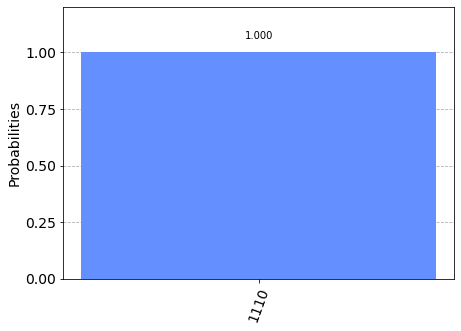

In [11]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

# Реализация инкремента

## Подготовка. Множественное управление

Обобщением вентилей с множественным управлением в qiskit является класс [MCMT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCMT.html). Для стандартных вентилей это можно сделать проще, а для CNOT вообще есть метод `.mct()` [[docs]](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.mct.html). 

In [ ]:
from qiskit.circuit.library import XGate

qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 1, 2])
# 0, 1, 2 управляют, 3 управляется
qc.mct([0, 1, 2], 3)
qc.measure(qr, cr)
print(qc)

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

## Простой инкремент
Напишите программу, которая выполняет простой инкремент так, как показано на схеме.

┌───┐ ░                ┌───┐ ░ ┌─┐         
qubits_0: ┤ X ├─░───■────■────■──┤ X ├─░─┤M├─────────
          └───┘ ░   │    │  ┌─┴─┐└───┘ ░ └╥┘┌─┐      
qubits_1: ──────░───■────■──┤ X ├──────░──╫─┤M├──────
          ┌───┐ ░   │  ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐   
qubits_2: ┤ X ├─░───■──┤ X ├───────────░──╫──╫─┤M├───
          └───┘ ░ ┌─┴─┐└───┘           ░  ║  ║ └╥┘┌─┐
qubits_3: ──────░─┤ X ├────────────────░──╫──╫──╫─┤M├
                ░ └───┘                ░  ║  ║  ║ └╥┘
  bits: 4/════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

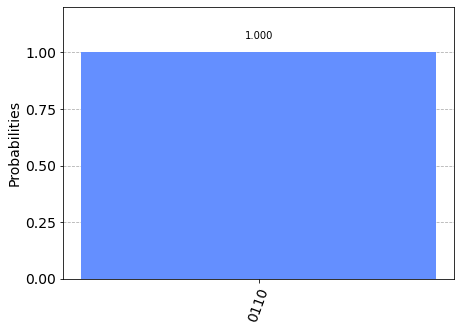

In [24]:
from qiskit.circuit.library import XGate

qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 2])
qc.barrier()

################ YOUR CODE HERE #########################

#########################################################
qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

[решение](Q61R_Increment_solution.ipynb)

## Будет ли работать инкремент для суперпозиции состояний?

Подготовьте суперпозицию состояний `-2` и `7`, а затем примените к ним инкремент.

Подсказка: $\frac{1}{\sqrt{2}}(|0111\rangle+|1110\rangle)$. Нужно подготовить пару Белла на 0 и 3 кубитах.

In [ ]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

########### YOUR CODE HERE ###############################


##########################################################

qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

[решение](Q61R_Increment_solution.ipynb)